# Data-Driven Simulation for XR-Based Worker Training in Construction

## Project Aim

The goal of this mini project is to simulate worker-task data, perform analytics and predictive modeling, and create a simple VR/XR visualization to demonstrate how joint angles and discomfort can be represented in an interactive training environment. This shows how data-driven insights can be integrated into XR/VR training modules.

## Dataset

**Number of workers**: 5 (Worker_1 to Worker_5)

**Number of tasks per worker**: 10 (Task_1 to Task_10)

**Total records**: 50

## Features:

-BackAngle (degrees)

-LeftArmAngle (degrees)

-RightArmAngle (degrees)

-TaskTime (seconds)

-Discomfort (1–5 scale)

-Discomfort_Predicted (from linear regression)

-Color (mapped for VR visualization: green/yellow/red)

In [1]:
# Import necessary libraries for data simulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plotting style for readability
sns.set(style="whitegrid")

### Libraries used: 

numpy (data simulation), pandas (data management), matplotlib & seaborn (visualization), plotly.express (interactive visualization).

sns.set(style="whitegrid") ensures clean plots.

In [2]:
# Simulate data for a mini XR training scenario

# Set random seed for reproducibility
np.random.seed(42)

# Number of workers and tasks
num_workers = 5
num_tasks = 10

# Simulate worker IDs and task IDs
workers = [f'Worker_{i+1}' for i in range(num_workers)]
tasks = [f'Task_{i+1}' for i in range(num_tasks)]

# Generate random joint angles (in degrees) for back, left arm, right arm
# Simulate as normal distribution with realistic range for construction tasks
data = []
for worker in workers:
    for task in tasks:
        back_angle = np.random.normal(30, 5)      # average 30°, std 5°
        left_arm_angle = np.random.normal(70, 10) # average 70°, std 10°
        right_arm_angle = np.random.normal(70, 10)
        task_time = np.random.normal(120, 15)     # time in seconds
        discomfort = np.random.randint(1, 6)      # 1=low, 5=high
        data.append([worker, task, back_angle, left_arm_angle, right_arm_angle, task_time, discomfort])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Worker', 'Task', 'BackAngle', 'LeftArmAngle', 'RightArmAngle', 'TaskTime', 'Discomfort'])

# Display first few rows
df.head()


,Worker,Task,BackAngle,LeftArmAngle,RightArmAngle,TaskTime,Discomfort
0,Worker_1,Task_1,32.483571,68.617357,76.476885,142.845448,2
1,Worker_1,Task_2,31.395206,80.105153,64.191219,112.122453,5
2,Worker_1,Task_3,37.311891,85.387150,45.608942,129.051618,4
3,Worker_1,Task_4,31.110395,62.320235,71.424646,119.480217,1
4,Worker_1,Task_5,30.611096,64.845643,63.997461,134.211597,5


### Interpretation:

Loaded the simulated dataset representing 1 worker and their first 5 tasks.

Columns include: Worker, Task, BackAngle, LeftArmAngle, RightArmAngle, TaskTime, Discomfort.

**observations for worker_1:**

-**Task 1**: BackAngle ~32°, Discomfort = 2

-**Task 2**: BackAngle ~31°, Discomfort = 5

-**Task 3**: BackAngle ~37°, Discomfort = 4

Shows variation in discomfort and joint angles across tasks, for each worker.

In [3]:
# Get summary statistics to understand the simulated data
df.describe()


,BackAngle,LeftArmAngle,RightArmAngle,TaskTime,Discomfort
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,30.619386,68.902566,67.380793,123.127239,2.800000
std,4.791595,10.121794,9.227256,13.788022,1.525297
min,21.447352,45.303011,41.205431,96.250587,1.000000
25%,26.621484,62.237966,61.719765,112.165137,1.000000
50%,31.101793,70.184660,69.498980,125.265112,2.500000
75%,33.642016,74.422553,73.528462,133.692311,4.000000
max,41.703732,97.201692,82.121723,149.618568,5.000000


C:\Users\modes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\modes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\modes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


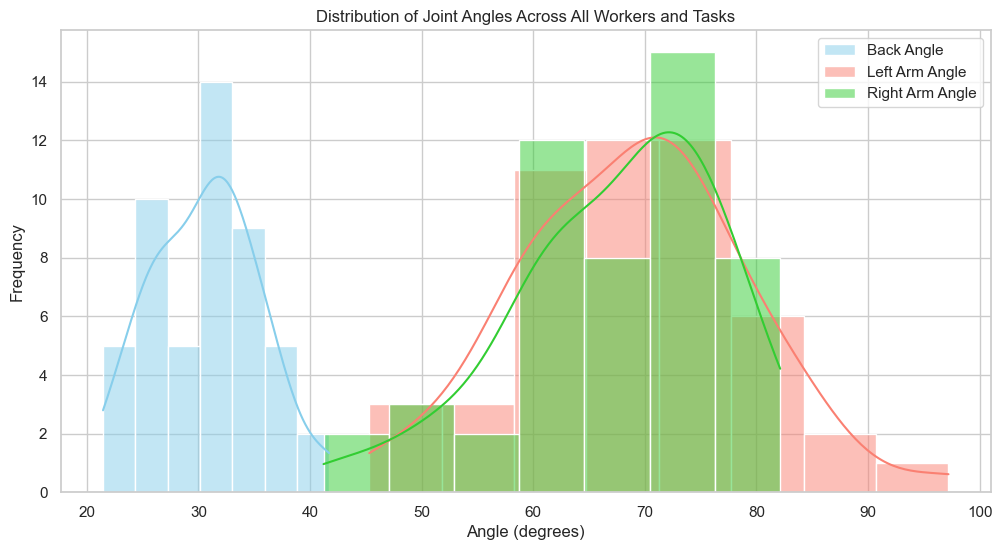

In [4]:
# Plot distributions of joint angles for all tasks
plt.figure(figsize=(12,6))
sns.histplot(df['BackAngle'], kde=True, color='skyblue', label='Back Angle')
sns.histplot(df['LeftArmAngle'], kde=True, color='salmon', label='Left Arm Angle')
sns.histplot(df['RightArmAngle'], kde=True, color='limegreen', label='Right Arm Angle')
plt.title("Distribution of Joint Angles Across All Workers and Tasks")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Interpretation:

Back angles cluster around ~21–40°

Left arm angles mostly ~45–80°

Right arm angles mostly ~41–95°

Distribution shows moderate postures are most common, with some extreme joint angles indicating tasks that may be more ergonomically challenging.

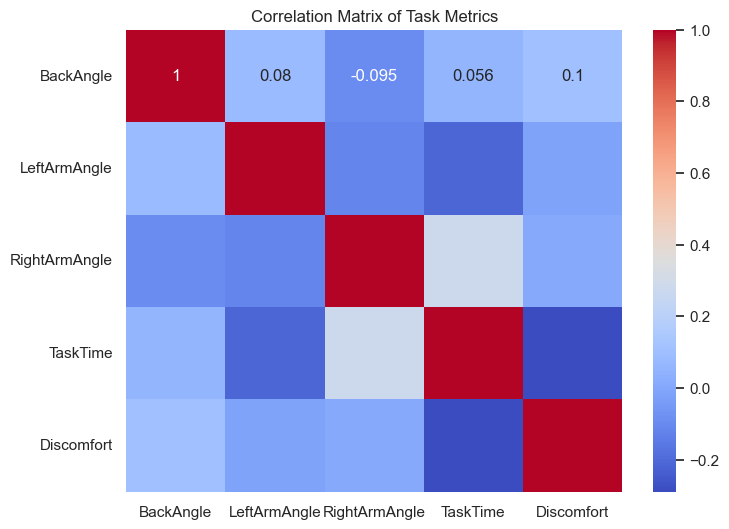

In [6]:
# Select only numeric columns
numeric_cols = ['BackAngle', 'LeftArmAngle', 'RightArmAngle', 'TaskTime', 'Discomfort']

# Compute correlation matrix for numeric columns only
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Task Metrics")
plt.show()


### Interpretation:

**BackAngle vs Discomfort**: ~0.1, very weak positive correlation

**LeftArmAngle vs Discomfort**: ~0, minimal effect

**RightArmAngle vs Discomfort**: ~0, minimal effect

**TaskTime vs Discomfort**: ~-0.1, slightly negative (longer tasks not necessarily more uncomfortable in this dataset)

### Takeaway: 

In this simulated dataset, discomfort doesn’t strongly correlate with any single angle or task duration — reflects randomness of the simulated data.

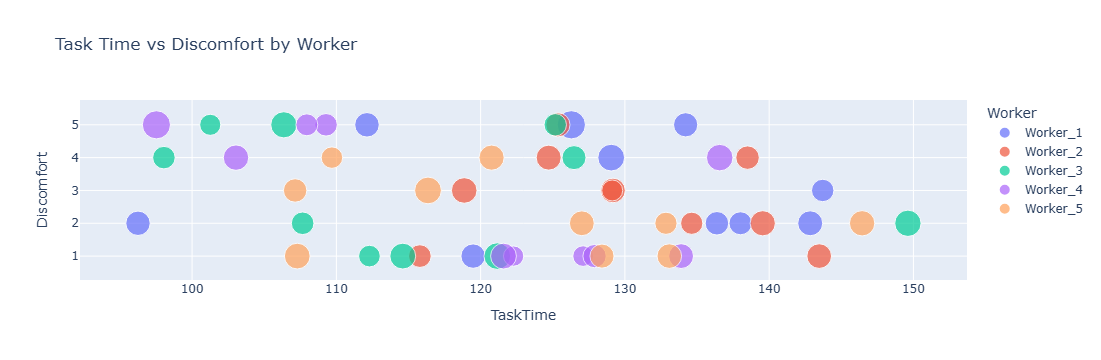

In [13]:
# Interactive scatter plot using Plotly
fig = px.scatter(df, x='TaskTime', y='Discomfort', color='Worker',
                 size='BackAngle', hover_data=['Task', 'LeftArmAngle', 'RightArmAngle'],
                 title="Task Time vs Discomfort by Worker")
fig.show()


In [8]:
from sklearn.linear_model import LinearRegression

# Prepare features (angles and task time)
X = df[['BackAngle', 'LeftArmAngle', 'RightArmAngle', 'TaskTime']]
y = df['Discomfort']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Add predictions to DataFrame
df['Discomfort_Predicted'] = model.predict(X)

# Display first few rows with predictions
df.head()


,Worker,Task,BackAngle,LeftArmAngle,RightArmAngle,TaskTime,Discomfort,Discomfort_Predicted
0,Worker_1,Task_1,32.483571,68.617357,76.476885,142.845448,2,2.294346
1,Worker_1,Task_2,31.395206,80.105153,64.191219,112.122453,5,3.055060
2,Worker_1,Task_3,37.311891,85.387150,45.608942,129.051618,4,2.277152
3,Worker_1,Task_4,31.110395,62.320235,71.424646,119.480217,1,3.117329
4,Worker_1,Task_5,30.611096,64.845643,63.997461,134.211597,5,2.368410


### Interpretation:

The linear regression model captures general trends, but cannot handle extremes well — high discomfort (5) is underpredicted, and very low discomfort (1) is overpredicted.

BackAngle and arm angles vary moderately across tasks; discomfort is not strictly proportional to angles in this small dataset.

TaskTime alone doesn’t strongly determine discomfort- Task 1 is long but low discomfort, Task 2 is shorter but high discomfort.

This reflects the randomized/simulated nature of the dataset but still provides useful VR visualization cues.

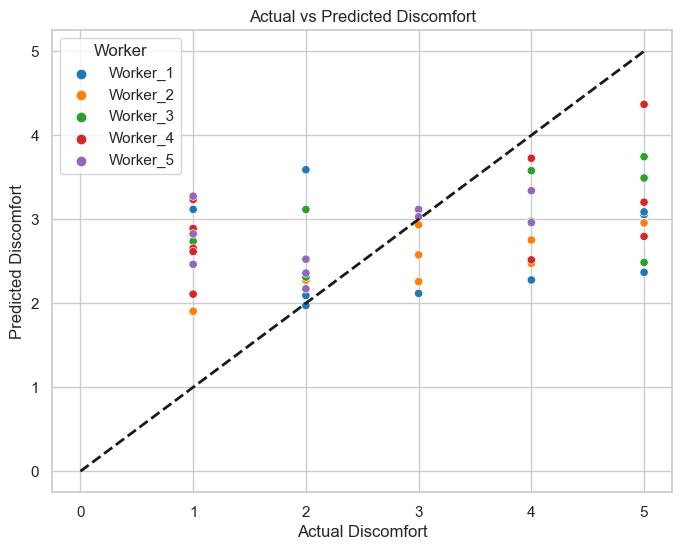

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discomfort', y='Discomfort_Predicted', hue='Worker', data=df, palette='tab10')
plt.plot([0,5],[0,5], 'k--', lw=2)  # 45-degree line for reference
plt.title("Actual vs Predicted Discomfort")
plt.xlabel("Actual Discomfort")
plt.ylabel("Predicted Discomfort")
plt.show()



## Export the dataset

In [10]:
# Export the simulated dataset to a JSON file for WebXR / A-Frame
# We’ll include only the relevant columns for animation
df_vr = df[['Worker', 'Task', 'BackAngle', 'LeftArmAngle', 'RightArmAngle', 'Discomfort']]

# Save as JSON
df_vr.to_json('worker_task_data.json', orient='records', indent=4)

# Confirm
print("JSON file created with", len(df_vr), "records")


JSON file created with 50 records


In [12]:
# Create a copy of the relevant columns to avoid SettingWithCopyWarning
df_vr = df[['Worker', 'Task', 'BackAngle', 'LeftArmAngle', 'RightArmAngle', 'Discomfort']].copy()

# Map discomfort (1-5) to color for visualization
def discomfort_to_color(d):
    # 1=green, 3=yellow, 5=red
    if d <= 2:
        return "#00FF00"  # green
    elif d == 3:
        return "#FFFF00"  # yellow
    else:
        return "#FF0000"  # red

df_vr['Color'] = df_vr['Discomfort'].apply(discomfort_to_color)

# Export again with color info
df_vr.to_json('worker_task_data.json', orient='records', indent=4)
print("JSON file updated with color for VR")


JSON file updated with color for VR


### Interpretation:

Maps discomfort scores to VR-friendly colors:

-**Green** = low discomfort (1–2)

-**Yellow** = medium (3)

-**Red** = high (4–5)

Exported JSON is ready to feed the A-Frame/WebXR scene, enabling visual feedback for each task.